In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Skew correction code with HOUGH transformation  for sample image display 

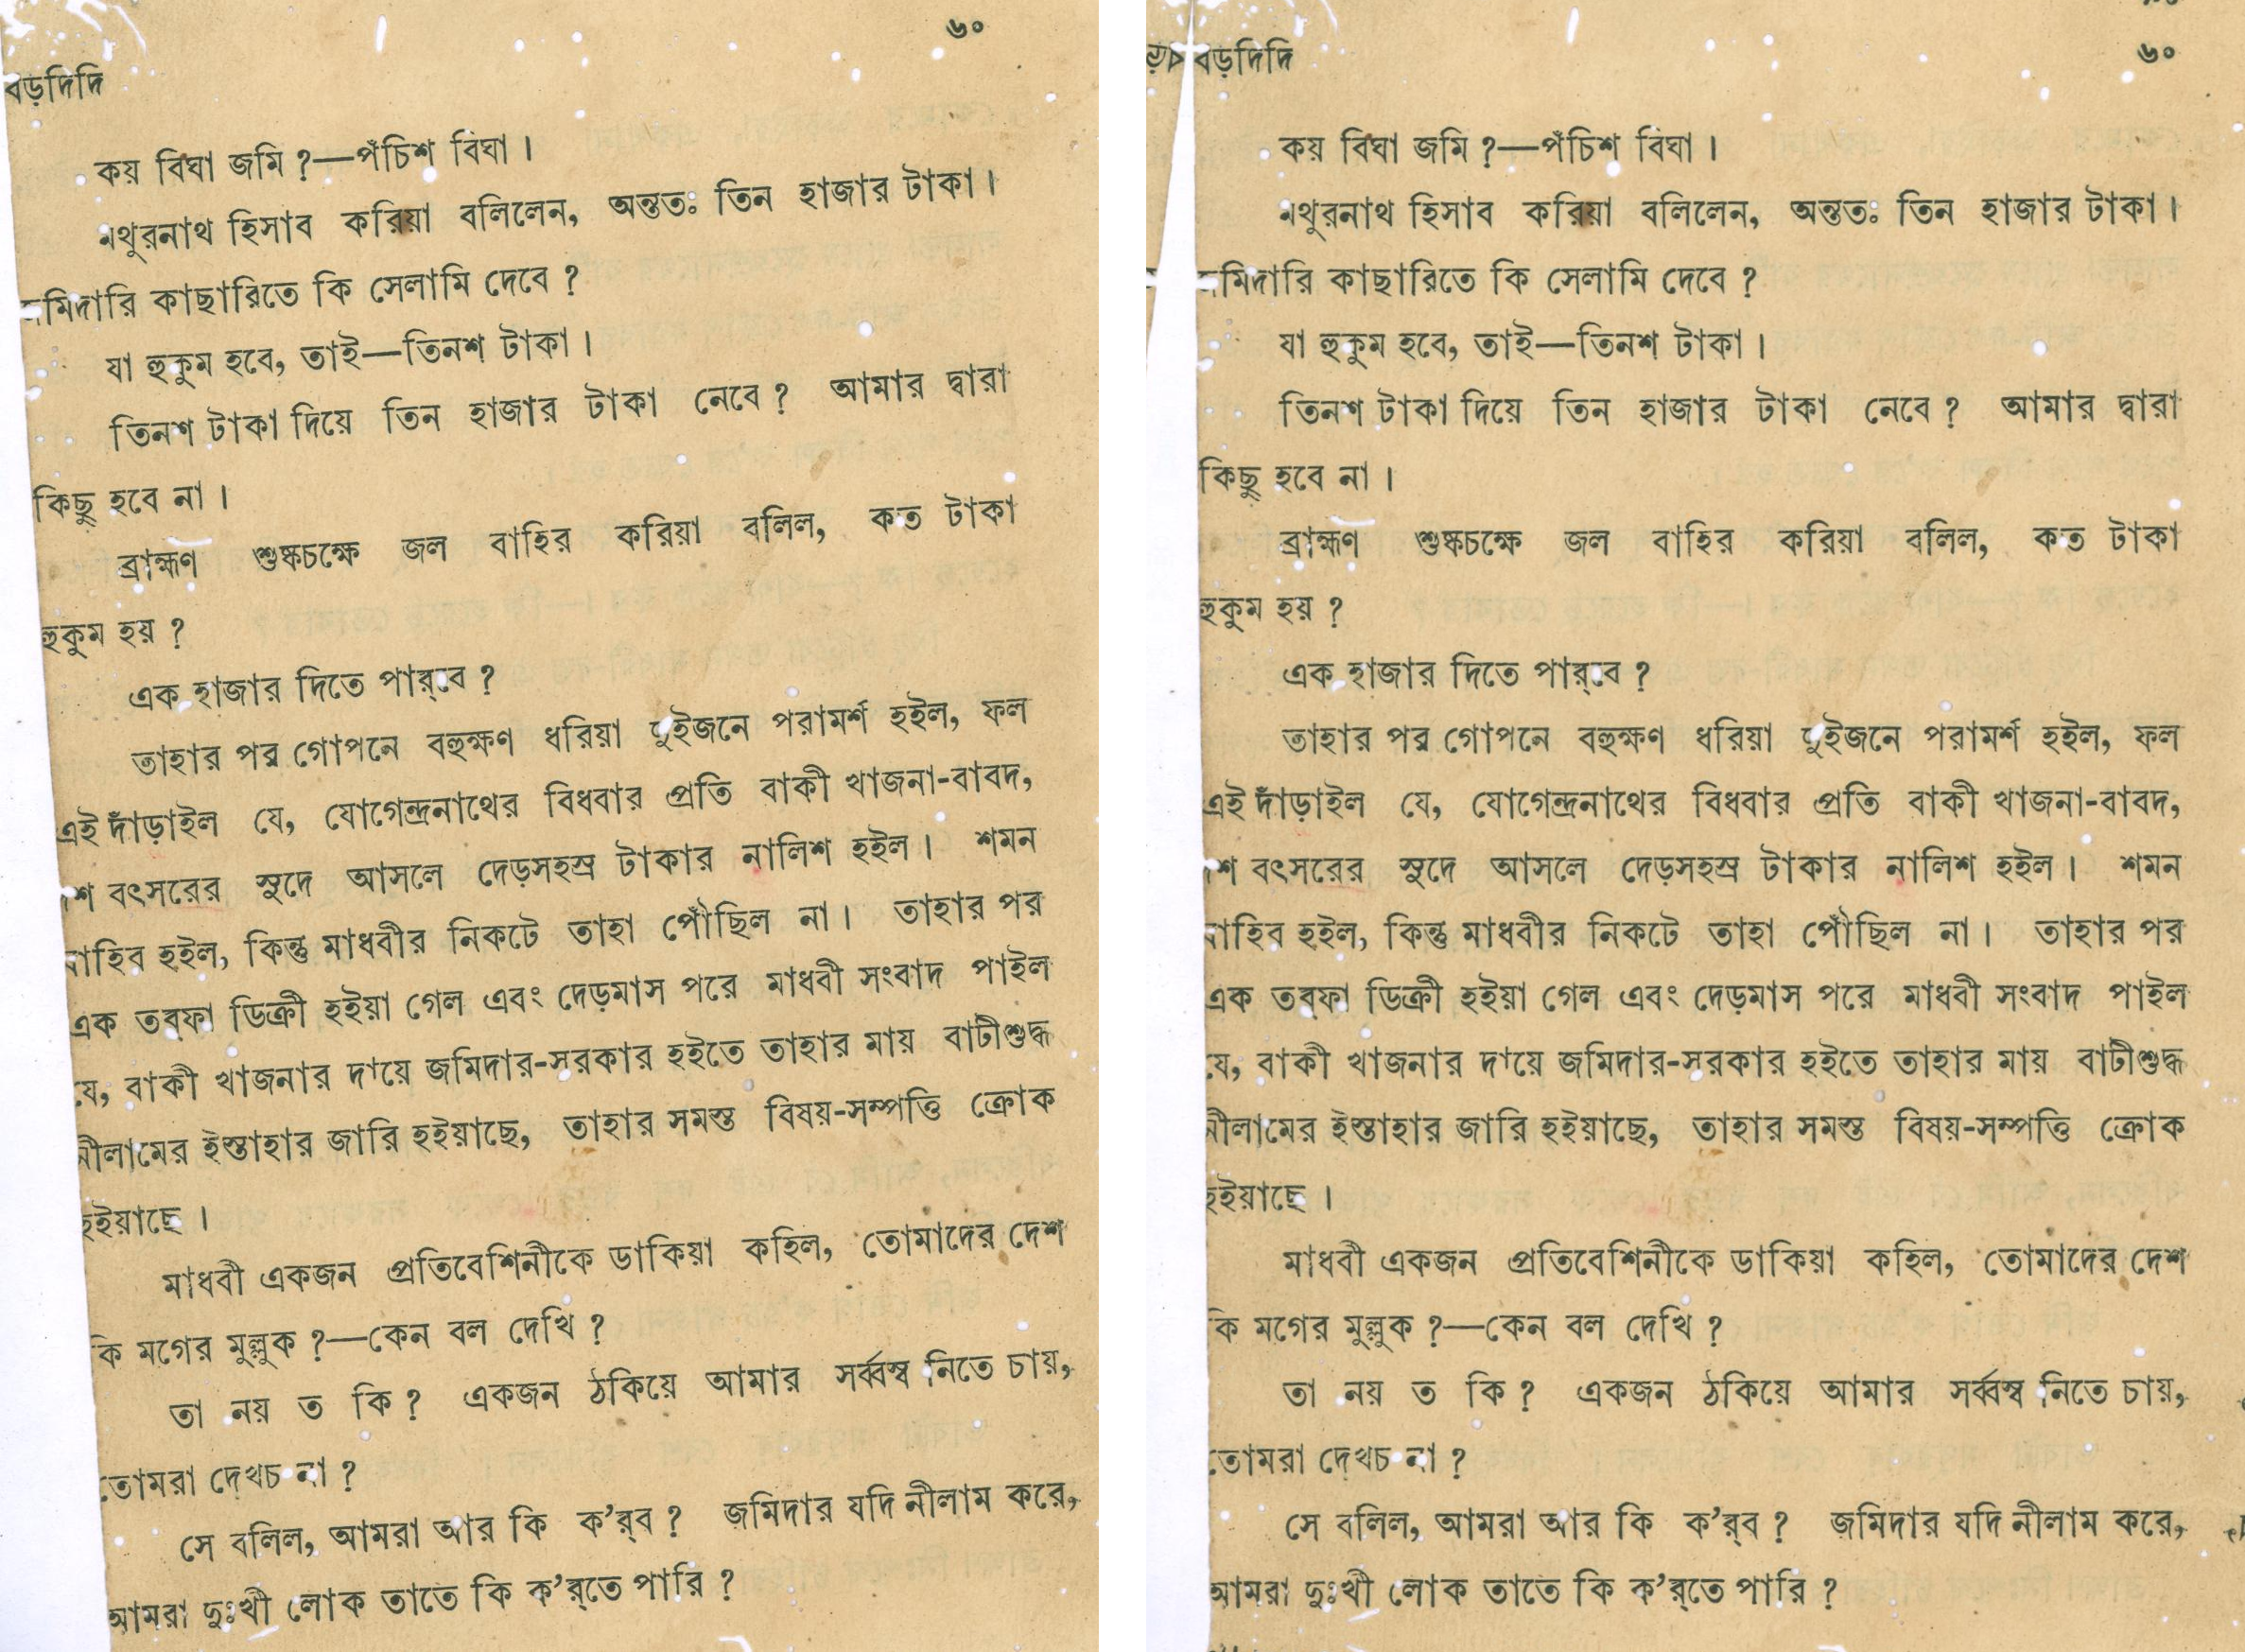

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def skew_correction(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    
    lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)
    angles = []

    for line in lines:
        x1, y1, x2, y2 = line[0]
        angles.append(np.degrees(np.arctan2(y2 - y1, x2 - x1)))

    
    median_angle = np.median(angles)

    
    rotation_matrix = cv2.getRotationMatrix2D(
        (image.shape[1] / 2, image.shape[0] / 2),
        median_angle,
        1
    )

    
    corrected_image = cv2.warpAffine(
        image,
        rotation_matrix,
        (image.shape[1], image.shape[0]),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_REFLECT
    )

    return corrected_image


image_path = '/content/drive/MyDrive/final thesis folder which contains all information/main dataset of degraded images/Bardidi_pg060.jpeg'
image = cv2.imread(image_path)


corrected_image = skew_correction(image)


blank_space = np.ones((image.shape[0], 50, 3), dtype=np.uint8) * 255  


combined_image = np.hstack((image, blank_space, corrected_image))


cv2_imshow(combined_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


Skew correction code with HOUGH transformation for dataset.

In [ ]:
################################################################## main skew correction code############################################################

import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

def skew_correction(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)
    angles = []

    for line in lines:
        x1, y1, x2, y2 = line[0]
        angles.append(np.degrees(np.arctan2(y2 - y1, x2 - x1)))

    median_angle = np.median(angles)

    rotation_matrix = cv2.getRotationMatrix2D((image.shape[1]/2, image.shape[0]/2), median_angle, 1)

    corrected_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

    return corrected_image

dataset_dir = '/content/drive/MyDrive/final thesis folder which contains all information/main dataset of degraded images'


output_dir = '/content/drive/MyDrive/final thesis folder which contains all information/after skew correction'


if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for filename in os.listdir(dataset_dir):
    if filename.endswith(".jpeg"):
        image_path = os.path.join(dataset_dir, filename)
        image = cv2.imread(image_path)


        corrected_image = skew_correction(image)

        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, corrected_image)
